# Neural Networks and Deep Learning Spring 1400 <img src = 'https://ece.ut.ac.ir/cict-theme/images/footer-logo.png' alt="Tehran-University-Logo" width="150" height="150" align="right">
## Project 1 - Question 4
### By Mahsa Masoud and Omid Vaheb

##Importing Required Libraries

In [1]:
import tensorflow as tf
import tensorflow.keras.datasets.cifar10 as cifar
import numpy as np
import pandas as pd
import keras
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import os
import cv2
import sys
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import optimizers

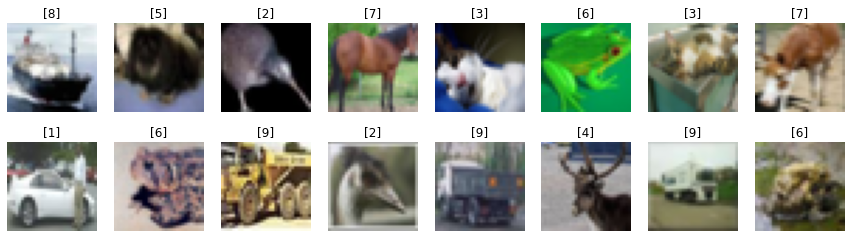

In [ ]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_train[random_index, :])
        ax.set_title([y_train[random_index]])
plt.show()

## Generating Different Images from One Image

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = '/content/gdrive/MyDrive/test.jpg' 
import cv2
import os
image = cv2.imread(path)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(rotation_range=15,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.4,1.5],
    zoom_range=0.3,
    width_shift_range=0.1,
    height_shift_range=0.1)

img = load_img(path)  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1 , save_to_dir='/content/gdrive/MyDrive/tmp' , save_prefix='bird', save_format='jpeg'):
    i += 1
    if i > 9:
        break

## Importing Dataset

In [2]:
data = cifar.load_data()
(X_train, y_train), (X_test, y_test) = data
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [3]:
X_train2 = []
y_train2 = []
dog_counter = 0
cat_counter = 0
for index in range(len(X_train)):
    if y_train[index] != 3 and y_train[index] != 5:
        X_train2.append(X_train[index])
        y_train2.append(y_train[index])
    if y_train[index] == 3 and cat_counter < 500:
        X_train2.append(X_train[index])
        y_train2.append(y_train[index])
        cat_counter += 1
    if y_train[index] == 5 and dog_counter < 500:
        X_train2.append(X_train[index])
        y_train2.append(y_train[index])
        dog_counter += 1

In [4]:
len(X_train2)

41000

In [5]:
X_train2 = np.asarray(X_train2)

In [6]:
y_train2 = np.asarray(y_train2)

## Model with few datapoints in dog and cat classes

In [41]:
model_drop_50 = Sequential([Input(shape = X_train[0].shape) ,Conv2D(filters = 32,kernel_size = (3,3), activation='relu',  padding="same" ),
                    Conv2D(filters =64,kernel_size =(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    Dropout(0.5) , 
                     
                    Conv2D(filters =64,kernel_size =(3,3), padding="same" , activation='relu'),
                    Conv2D(filters =128,kernel_size =(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    Dropout(0.5) , 
                   
                    Conv2D(filters =128,kernel_size =(3,3),  padding="same" ,activation='relu'),
                    Conv2D(filters =256,kernel_size =(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    Dropout(0.5) , 

                    Flatten(),
                    Dense(256, activation='relu'),
                    Dense(10, activation='softmax')])

model_drop_50.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_drop_50.summary()
r_drop_50 = model_drop_50.fit(X_train2, y_train2, validation_data=(X_test, y_test), epochs=30 , batch_size=128)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 128)        

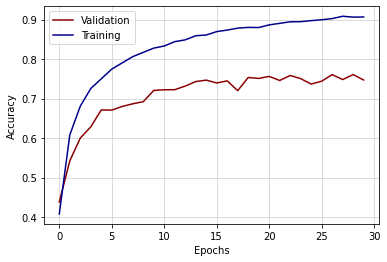

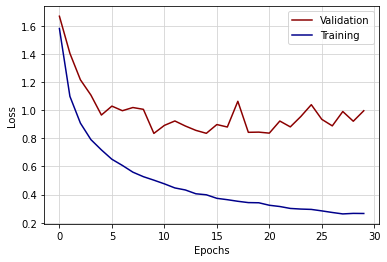

In [42]:
history = r_drop_50.history
acc_val = history['val_accuracy']
acc_tra = history['accuracy']

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc_val, 'darkred')
plt.plot(acc_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

loss_val = history['val_loss']
loss_tra = history['loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss_val, 'darkred')
plt.plot(loss_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

In [43]:
Y_pred = model_drop_50.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model_drop_50.evaluate(X_test, y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.9968 - accuracy: 0.7468
Test Loss 0.9968368411064148
Test Accuracy 0.7468000054359436


## Confusion Matrix 

In [44]:
from sklearn.metrics import confusion_matrix , classification_report
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[809  12  61   5  31   0  13  12  34  23]
 [  9 904   1   1   4   3   8   2  18  50]
 [ 38   2 744   7  92  10  66  34   4   3]
 [ 28   2 123 259 166  64 237 101   9  11]
 [  9   0  28   8 876   4  47  24   3   1]
 [ 11   4 154  86 145 311 142 136   6   5]
 [  4   0  35   2  34   1 914   7   1   2]
 [  6   1  16  10  69   8  15 869   2   4]
 [ 56  10  12   2   5   0   9   4 886  16]
 [ 19  34   5   3   7   2  12   9  13 896]]


## Model with Data Augmentation

In [7]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.3
    )

In [8]:
dog_counter = 0
cat_counter = 0
dog_X_train2 = []
dog_y_train2 = []
cat_X_train2 = []
cat_y_train2 = []
for index in range(len(X_train)):
    if y_train[index] == 3 and cat_counter < 500:
        cat_X_train2.append(X_train[index])
        cat_y_train2.append(y_train[index])
        cat_counter += 1
    if y_train[index] == 5 and dog_counter < 500:
        dog_X_train2.append(X_train[index])
        dog_y_train2.append(y_train[index])
        dog_counter += 1

In [9]:
dog_X_train2 = np.asarray(cat_X_train2)
cat_X_train2 = np.asarray(cat_X_train2)
dog_y_train2 = np.asarray(dog_y_train2)
cat_y_train2 = np.asarray(cat_y_train2)

In [10]:
temp = []
temp2 = []
for i in range(9):
    it_train = datagen.flow(dog_X_train2, dog_y_train2, batch_size=500)
    for j in range(500):
        batch = it_train.next()
        image = batch[0].astype('uint8')
        temp.append(image)
        temp2.append(batch[-1].astype('uint8')[0])
    print(i)
for i in range(9):
    it_train = datagen.flow(cat_X_train2, cat_y_train2, batch_size=500)
    for j in range(500):
        batch = it_train.next()
        image = batch[0].astype('uint8')
        temp.append(image[0])
        temp2.append(batch[-1].astype('uint8')[0])

0
1
2
3
4
5
6
7
8


In [10]:
X_train3 = np.concatenate((X_train2, temp))

In [11]:
y_train3 = np.concatenate((y_train2, temp2))

In [12]:
model_drop_50 = Sequential([Input(shape = X_train[0].shape) ,Conv2D(filters = 32,kernel_size = (3,3), activation='relu',  padding="same" ),
                    Conv2D(filters =64,kernel_size =(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    Dropout(0.5) , 
                     
                    Conv2D(filters =64,kernel_size =(3,3), padding="same" , activation='relu'),
                    Conv2D(filters =128,kernel_size =(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    Dropout(0.5) , 
                   
                    Conv2D(filters =128,kernel_size =(3,3),  padding="same" ,activation='relu'),
                    Conv2D(filters =256,kernel_size =(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    Dropout(0.5) , 

                    Flatten(),
                    Dense(256, activation='relu'),
                    Dense(10, activation='softmax')])

In [13]:
model_drop_50.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_drop_50.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0

In [14]:
r_drop_50 = model_drop_50.fit(X_train3, y_train3, validation_data=(X_test, y_test), epochs=30 , batch_size=128)

Epoch 1/30
391/391 [==============================] - 48s 44ms/step - loss: 1.8438 - accuracy: 0.3172 - val_loss: 1.2643 - val_accuracy: 0.5435
Epoch 2/30
391/391 [==============================] - 16s 41ms/step - loss: 1.1633 - accuracy: 0.5793 - val_loss: 0.9713 - val_accuracy: 0.6484
Epoch 3/30
391/391 [==============================] - 16s 41ms/step - loss: 0.9129 - accuracy: 0.6770 - val_loss: 0.8627 - val_accuracy: 0.6929
Epoch 4/30
391/391 [==============================] - 16s 41ms/step - loss: 0.7689 - accuracy: 0.7269 - val_loss: 0.7210 - val_accuracy: 0.7488
Epoch 5/30
391/391 [==============================] - 16s 42ms/step - loss: 0.6602 - accuracy: 0.7679 - val_loss: 0.6944 - val_accuracy: 0.7569
Epoch 6/30
391/391 [==============================] - 16s 41ms/step - loss: 0.5682 - accuracy: 0.8019 - val_loss: 0.6915 - val_accuracy: 0.7688
Epoch 7/30
391/391 [==============================] - 16s 42ms/step - loss: 0.5097 - accuracy: 0.8227 - val_loss: 0.6216 - val_accuracy:

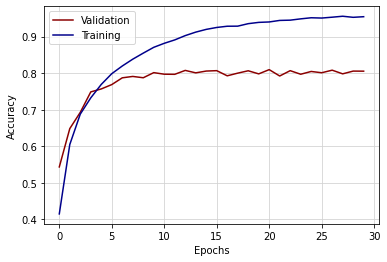

In [15]:
history = r_drop_50.history
acc_val = history['val_accuracy']
acc_tra = history['accuracy']

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc_val, 'darkred')
plt.plot(acc_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

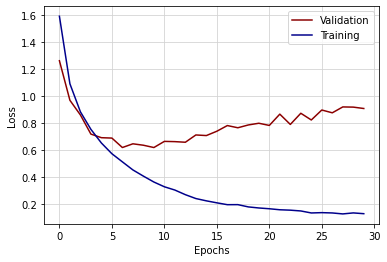

In [16]:
loss_val = history['val_loss']
loss_tra = history['loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss_val, 'darkred')
plt.plot(loss_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

In [17]:
Y_pred = model_drop_50.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model_drop_50.evaluate(X_test, y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.9106 - accuracy: 0.8055
Test Loss 0.9105793237686157
Test Accuracy 0.8054999709129333


In [18]:
from sklearn.metrics import confusion_matrix , classification_report
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[797  14  50  13  10   3   4  12  68  29]
 [  2 936   0   1   0   2   4   2  12  41]
 [ 42   3 744  32  57  47  42  19  10   4]
 [ 18   7  54 582  58 157  51  51   8  14]
 [ 12   2  45  30 785  35  32  50   6   3]
 [  9   4  30 125  33 725  13  50   7   4]
 [  7   5  36  35  23  22 858   3   7   4]
 [  5   3  15  26  26  37   7 866   2  13]
 [ 27  30   5   7   4   3   5   4 894  21]
 [ 24  69   3   8   2   4   4  10   8 868]]
